# Jupyter and the Greeks; Number, Figure, Algorithm

As prelude, warm-up, and demonstration we recall the Euclidean Algorithm and Conics. Our (old) title comes from the work of [Tobias Dantzig](https://archive.org/details/bequestofthegree032880mbp)

## The Euclidean Algorithm

Integer arithmetic offers no surprises regarding addition and subtraction. While multiplication can be seen as specified number of additions, division is an *unspecified* number of subtractions. For example, $3\cdot 4=4+4+4$, i.e., 4 three times, while to ask for $14/3$ in integers is to request an integer **quotient**, $q$, and integer **remainder**, $0\le r<3$, such that $14=3q + r$. To accomplish this we repeatedly subtract 3 from 14 until the remainder is less than 3. We recognize this sentence as a recipe, procedure, or **algorithm** that we ought to be able to code. Perhaps the most difficult aspect of its implementation is flipping the English locution "until condition is true" to the more standard python locution "while condition is false." Do you see how we accomplished this in the code cell below? Can you decode each line? If these lines do not have line numbers please click the *View* tab above and select *Toggle Line Numbers*.

In [24]:
# Euclid Division Algorithm, given n and d return q and r such that  
# n = dq + r  where r is as small as possible

def ediv(n,d):      # function that takes n and d and returns q and r
    r = n
    q = 0
    while r >= d:
        r = r - d
        q = q + 1
    return q, r

print(ediv(14,3))  # please change the 14 and 3 and run this cell again

(4, 2)


\begin{exercise}\label{ex:negdiv}
This implementation fails when $n<0$. Can you explain how to fix it, assuming $0<d<|n|$? In particular, please state how lines 5 and 9 should be changed?
\end{exercise}

Your answer here.

The utility of this **algorithm** is difficult to overstate. Let's see how to use it to find the **greatest common divisor** of two integers, $a$ and $b$.

In [11]:
# Euclid gcd, given   a>b

def egcd(a,b):
    while b>0:
        q, r = ediv(a,b)
        a = b
        b = r
    return a

print(egcd(20, 15))

5


We now illustrate this path...

2


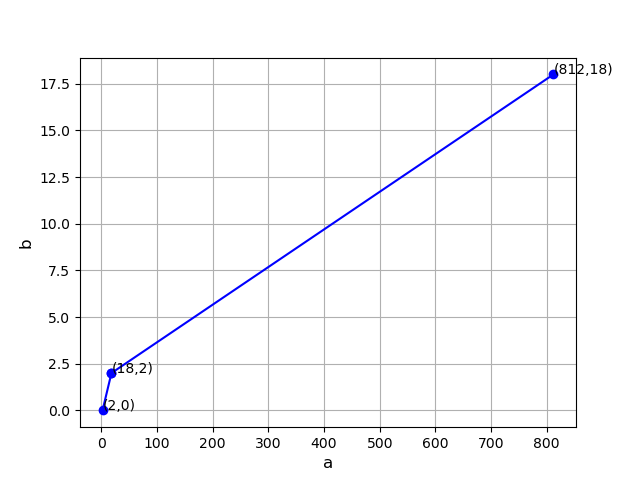

In [27]:
# deluxe Euclid gcd, now with graphics

%matplotlib widget   
import matplotlib.pyplot as plt   # import the plot library as plt (the line above gives you control of the plot)

def degcd(a,b): 
    plt.text(a, b, "(" + str(a) + "," + str(b) + ")")   # mark the starting point
    while b>0:
        q, r = ediv(a,b)
        plt.plot([a,b], [b,r], 'bo-')                     # connect the dots
        plt.text(b, r, "(" + str(b) + "," + str(r) + ")")  # mark the next iterate
        a = b
        b = r
    return a

plt.figure("GCD")
print(degcd(812,18))   # please replace numbers and re-run

plt.grid('on')                 # add grid and label axes
plt.xlabel('a', fontsize=12)
plt.ylabel('b', fontsize=12);

\begin{myfig}\label{fig:degcd} Illustration of the Euclidean path to the greatest common divisor of two numbers.
As you explore larger pairs you may have trouble seeing the endgame. With your mouse resting in the plot you should see a few plot tools at upper left, zoom and download being the most useful. Please give them both a try. \end{myfig}

## Conic Sections

Given two lines in $\maR^3$ that intersect at one point we rotate one about the other to achieve a cone. We explore in Figure \ref{fig:conicW} the intersection of a plane with such a cone. Their intersection is called a **conic section** and its projection onto a fixed plane, $(x,y)$ in our case, is called a conic.

We see that, except for a few degenerate cases that conics are either parabolas, ellipses, or hyperbolas.

In [5]:
# conic widget

%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import *

plt.ioff()

fig = plt.figure(' ') # ,figsize=(6,6))
ax = plt.axes(projection="3d")    # set up for 3D work

# build the cone, parametrized as (r*cos(t), r*sin(t), r)  and (r*cos(t), r*sin(t), -r)
r = np.linspace(0,3,100)
t = np.linspace(0,2*np.pi,100)
R, T = np.meshgrid(r, t)   
Zc = R
Xc = R*np.cos(T)
Yc = R*np.sin(T)
ax.plot_surface(Xc, Yc, Zc, alpha = 0.5, color='r') 
ax.plot_surface(Xc, Yc, -Zc, alpha = 0.5, color='r') 

# plot the intersecting plane 
x = np.linspace(-3,3,100)
y = np.linspace(-3,3,100)
X, Y = np.meshgrid(x, y)
m = 0
Z = -np.ones(X.shape) + m*X  
P  = ax.plot_surface(X, Y, Z, alpha = 0.25, color='b')

# find their intersection
nr = 1/(1+m*np.cos(t))  #  z = -r on cone, while z = mx - 1 on plane, so -r = m*r*cos(t) - 1 (solve for r)
nr[abs(nr)>3] = np.nan  # only keep the parts which lie on the cone
conic = ax.plot(nr*np.cos(t), nr*np.sin(t), -nr, 'k')
pconic = ax.plot(nr*np.cos(t), nr*np.sin(t), np.zeros(t.shape), 'k--') # project onto (x,y) plane

ax.set(xlim=(-3,3), ylim=(-3,3), zlim=(-3,3))
ax.set_xlabel('x', fontsize=12)
ax.set_ylabel('y', fontsize=12)
ax.set_zlabel('z', fontsize=12)

mS = widgets.FloatSlider(min=-3, max=3, step=0.1, value=0)   # let the user vary the slope, m

def update(m = mS): 
    
    ax.clear()   # going brute force as plot_surface (with P,) is not iterable
    ax.plot_surface(Xc, Yc, Zc, alpha = 0.5, color='r') 
    ax.plot_surface(Xc, Yc, -Zc, alpha = 0.5, color='r') 
    Z = -np.ones(X.shape) + m*X  
    #P.set_data_3d(X, Y, Z)
    ax.plot_surface(X, Y, Z, alpha = 0.25, color='b')

    nr = 1/(1+m*np.cos(t))
    nr[abs(nr)>3] = np.nan
    ax.plot(nr*np.cos(t), nr*np.sin(t), -nr, 'k')
    ax.plot(nr*np.cos(t), nr*np.sin(t), np.zeros(t.shape), 'k--')
    #conic.set_data_3d(nr*np.cos(t), nr*np.sin(t), -nr)
    
    ax.set(xlim=(-3,3), ylim=(-3,3), zlim=(-3,3))
    ax.set_xlabel('x', fontsize=12)
    ax.set_ylabel('y', fontsize=12)
    ax.set_zlabel('z', fontsize=12)
    fig.canvas.draw_idle()

widgets.interactive(update)
layoutS = widgets.Layout(display='flex', flex_flow='column', justify_content='center')
controls = widgets.VBox([mS], layout = layoutS)
widgets.HBox([fig.canvas, controls])

\begin{myfig}\label{fig:conicW} Where the blue plane intersects the red cone we find a black conic section. The projection of this curve onto the $(x,y)$ plane yields the dotted black curve. The blue plane is $z=mx-1$ with the slope $m$ chosen by the slider. The fixed red cone is the rotation of the line $z=x,y=0$ about the $z$-axis. \end{myfig}

In order to establish this we need to agree on definitions of the basic objects. We start in the plane without coordinates. We fix two points $F_1$ and $F_2$, enclose them in a loop of thread of length $L$, stretch the loop tight with a pencil at point $P$ and note that $\|F_1-P\|+\|F_2-P\|+\|F_1-F_2\|=L$. As $L$ and the two foci are fixed, we learn that

\begin{equation}\label{eq:ellip}
  \|F_1-P\|+\|F_2-P\| = \hbox{constant}
\end{equation}

and **define** an ellipse to be curve whose points obey (\ref{eq:ellip}). On reversing the sign,

\begin{equation}\label{eq:hyp}
  \|F_1-P\|-\|F_2-P\| = \hbox{constant}
\end{equation}

we **define** a hyperbola to be curve whose points obey (\ref{eq:hyp}). Back to the ellipse, we keep $F_1$ fixed, and we arrive at two familiar curves as we move $F_2$ to its extremes. In the easy case, as $F_2$ approaches $F_1$ we arrive at the circle, $\|F_1-P\|=\hbox{constant}$. In the other extreme we let $F_2\to\infty$ along the line through the foci.


